In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Product data

In [2]:
df_product = pd.read_csv(r'dataset_1')
df_product = df_product.drop(df_product.columns[0], axis=1)

In [3]:
df_product.head()

,vendor,category_level_1,category_level_2,category_level_3,highest_category,product,price in $,shipping_from,shipping_to
0,greenleafde,Drugs and Chemicals,Cannabis & Hash,Buds & Flowers,Buds & Flowers,5G HINDU KUSH [FASTSHIP],71.00,Germany,Worldwide
1,RS7,Drugs and Chemicals,Stimulants,Cocaine,Cocaine,**(4.5G)** Pure Colombian Cocaine (UNCUT),324.92,Netherlands,Worldwide
2,dexterslabs,Drugs and Chemicals,Prescriptions Drugs,NaN,Prescriptions Drugs,280x Pills 10 boxes Codeine Phosphate 30mg,251.09,United Kingdom,United Kingdom
3,heyzeus,Drugs and Chemicals,Cannabis & Hash,Buds & Flowers,Buds & Flowers,AAA+ Blue Ice Indoor Hydro 1/4lb FREE SHIPPING,680.00,United States,United States
4,timmy622,Drugs and Chemicals,Stimulants,Cocaine,Cocaine,7g Benzocaine 99.9% Pure | Free UK Delivery,9.76,United Kingdom,Worldwide


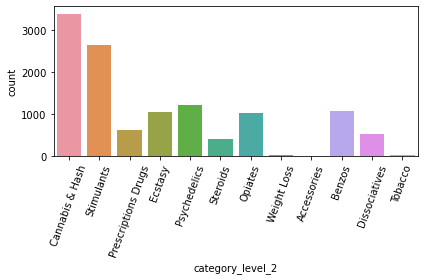

In [4]:
chart = sns.countplot(
    data=df_product,
    x='category_level_2')
plt.xticks(rotation=70)
plt.tight_layout()

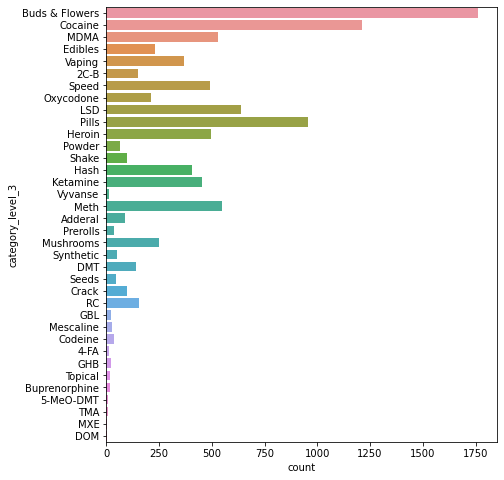

In [5]:
plt.figure(figsize=(7, 8))
chart = sns.countplot(
    data=df_product,
    y='category_level_3')

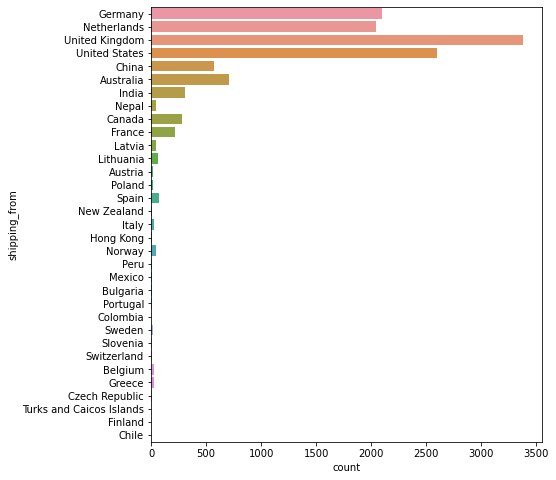

In [6]:
plt.figure(figsize=(7,8))
chart = sns.countplot(
    data=df_product,
    y='shipping_from')

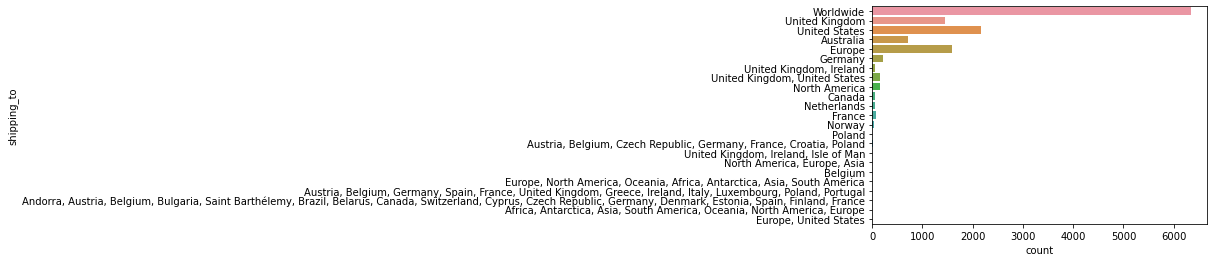

In [7]:
chart = sns.countplot(
    data=df_product,
    y='shipping_to')

In [8]:
# percentages: Almost 50% offers world wide shipping
df_product['shipping_to'].value_counts(normalize=True) * 100

Worldwide                                                                                                                                                                 48.327364
United States                                                                                                                                                             16.551093
Europe                                                                                                                                                                    12.055170
United Kingdom                                                                                                                                                            10.980721
Australia                                                                                                                                                                  5.471310
Germany                                                                                             

### Vendor data

In [9]:
df_vendor = pd.read_csv(r'dataset_vendor')
df_vendor = df_vendor.drop(df_vendor.columns[0], axis=1)

In [10]:
df_vendor.head()

,vendor,rank,verifcation,since,transactions,feedback_total,feedback_positive,feedback_negative,disputes_total,disputes_won,disputes_lost,finalize_early
0,2GD4DN,Rank 1,Verification Level 1,"Jun 9, 2020",33,17,82.35% (14),17.65% (3),2,50% (1),0% (0),Not Available
1,420Quality,Rank 0,Verification Level 4,"Oct 29, 2020",0,0,0% (0),0% (0),0,0% (0),0% (0),Not Available
2,4Score,Rank 0,NaN,"Nov 18, 2020",1,0,0% (0),0% (0),0,0% (0),0% (0),Not Available
3,50bucks,Rank 1,NaN,"Feb 21, 2021",24,7,100% (7),0% (0),0,0% (0),0% (0),Not Available
4,8drugsafe,Rank 1,Verification Level 5,"Apr 25, 2020",28,4,100% (4),0% (0),0,0% (0),0% (0),Not Available


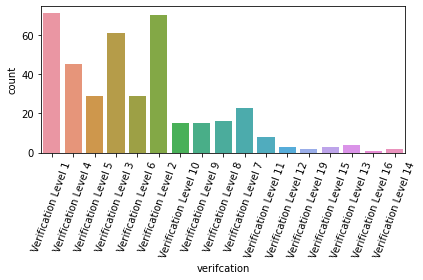

In [11]:
chart = sns.countplot(
    data=df_vendor,
    x='verifcation'
)
plt.xticks(rotation=70)
plt.tight_layout()

In [12]:
df_vendor['year'] = df_vendor['since'].str[-5:].astype(int)

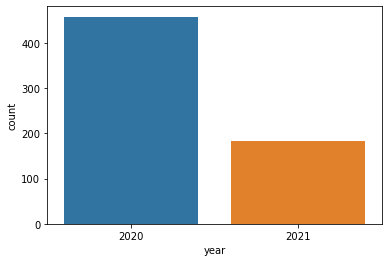

In [13]:
chart = sns.countplot(
    data=df_vendor,
    x='year')

In [14]:
df_vendor['date'] = pd.to_datetime(df_vendor['since'])
df_vendor_month = df_vendor.groupby(df_vendor['date'].dt.strftime('%B %Y'))['vendor'].count().reset_index()

In [15]:
df_vendor_month['date'] = pd.to_datetime(df_vendor_month["date"], format= '%B %Y')
df_vendor_month = df_vendor_month.sort_values('date')
df_vendor_month['cumulative_sum_vendor'] = df_vendor_month['vendor'].cumsum()
df_vendor_month.date = df_vendor_month.date.dt.strftime('%B %Y')

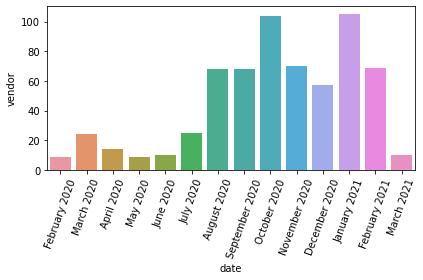

In [16]:
chart = sns.barplot(
    data=df_vendor_month,
    x='date',
    y='vendor')
plt.xticks(rotation=70)
plt.tight_layout()

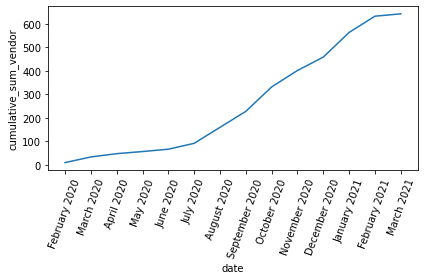

In [17]:
sns.lineplot(data=df_vendor_month, x="date", y='cumulative_sum_vendor')
plt.xticks(rotation=70)
plt.tight_layout()

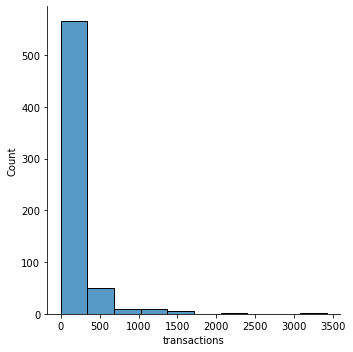

In [18]:
# distibution number of transactions per vendor
sns.displot(df_vendor, x="transactions", bins=10)

In [19]:
# outliers
df_vendor[df_vendor.transactions>2000]

,vendor,rank,verifcation,since,transactions,feedback_total,feedback_positive,feedback_negative,disputes_total,disputes_won,disputes_lost,finalize_early,year,date
259,PilotElon,TOP,Verification Level 3,"Mar 20, 2020",3422,925,91.68% (848),4.22% (39),85,20% (17),67.06% (57),Not Available,2020,2020-03-20
339,Tripwirewiki2,TOP,Verification Level 6,"Sep 8, 2020",2341,1494,99.26% (1483),0.47% (7),5,20% (1),20% (1),Available (only optional),2020,2020-09-08


### Merge product and vendor data

In [20]:
df_products_vendor = df_product['vendor'].value_counts().reset_index()

In [21]:
df_products_vendor.rename(columns={'index': 'vendor', 'vendor': 'n_products'}, inplace=True)

In [22]:
new_df_vendor = pd.merge(df_vendor, df_products_vendor)

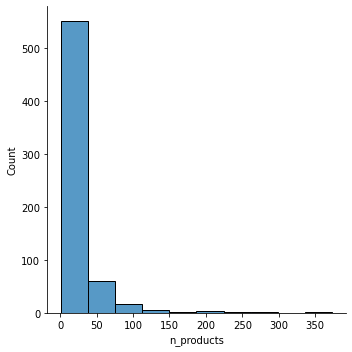

In [23]:
# distribution number of products per vendor offered 
sns.displot(new_df_vendor, x="n_products", bins=10)

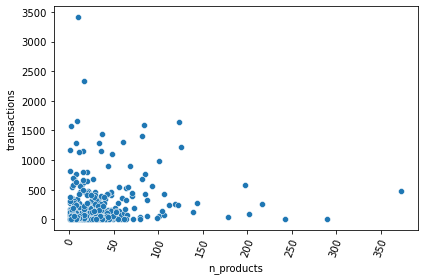

In [24]:
sns.scatterplot(data=new_df_vendor, x="n_products", y='transactions')
plt.xticks(rotation=70)
plt.tight_layout()